In [13]:
import pandas as pd
from sklearn.datasets import make_blobs
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense
import numpy as np
from mlxtend.plotting import plot_decision_regions


In [2]:
X, y = make_blobs(n_samples=1000,n_features=2,centers=2)
df = pd.DataFrame(dict(x= X[:,0], y= X[:,1],labels=y))

In [3]:
df

,x,y,labels
0,4.117915,-6.735390,1
1,-4.802999,3.164849,0
2,6.623929,-8.579113,1
3,-6.244687,2.211291,0
4,7.290673,-7.808085,1
...,...,...,...
995,-5.708330,2.515039,0
996,-5.103254,1.519977,0
997,5.247665,-7.892694,1
998,-6.099876,1.056119,0


In [4]:
model = Sequential()
model.add(Dense(2,activation="sigmoid",input_dim=2))
model.add(Dense(1,activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [5]:
initial_weights = model.get_weights()

In [6]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)



In [7]:
model.set_weights(initial_weights)

In [8]:
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [11]:
model.compile(loss="binary_crossentropy",optimizer='adam',metrics=["accuracy"])
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
25/25 [==============================] - 2s 7ms/step - loss: 0.6932 - accuracy: 0.4888 - val_loss: 0.6931 - val_accuracy: 0.4850
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5038 - val_loss: 0.6918 - val_accuracy: 0.4850
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6887 - accuracy: 0.5038 - val_loss: 0.6859 - val_accuracy: 0.4850
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6794 - accuracy: 0.5038 - val_loss: 0.6744 - val_accuracy: 0.4850
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6661 - accuracy: 0.5038 - val_loss: 0.6601 - val_accuracy: 0.4850
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6508 - accuracy: 0.5038 - val_loss: 0.6451 - val_accuracy: 0.4850
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6353 - accuracy: 0.5038 - val_loss: 0.6301 - val_accuracy: 0.4850
Epoch 8/100
2

In [14]:
model.get_weights()

[array([[ 0.9407008,  0.9407008],
        [-0.7987341, -0.7987341]], dtype=float32),
 array([-1.1539639, -1.1539639], dtype=float32),
 array([[1.927687],
        [1.927687]], dtype=float32),
 array([-1.5827514], dtype=float32)]

<AxesSubplot:>

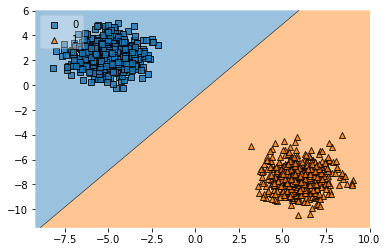

In [15]:
plot_decision_regions(X,y.astype('int'),clf=model,legend=2)